Entrenamiento de Modelo de Aprendizaje Profundo

In [ ]:
#Importacion de librerias

import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

import numpy as np

# Librerias para modelos de aprendizaje profundo
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
# Cargar dataset
df = pd.read_csv("out/metrics.csv")

# Mostrar las primeras filas del DataFrame
print(df.head())

  Mote id  distancia  success_rate  loss_count  varianza  longest_loss_streak
0   Mote1         20      0.941333         176  0.055243                   28
1   Mote2         20      0.888000         336  0.099489                   80
2   Mote3         20      1.000000           0  0.000000                    0
3   Mote4         20      0.396333        1811  0.239333                  144
4   Mote5         20      0.873667         379  0.110410                   86



=== Fold 1 ===


d:\Proyectos\JProyecto\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


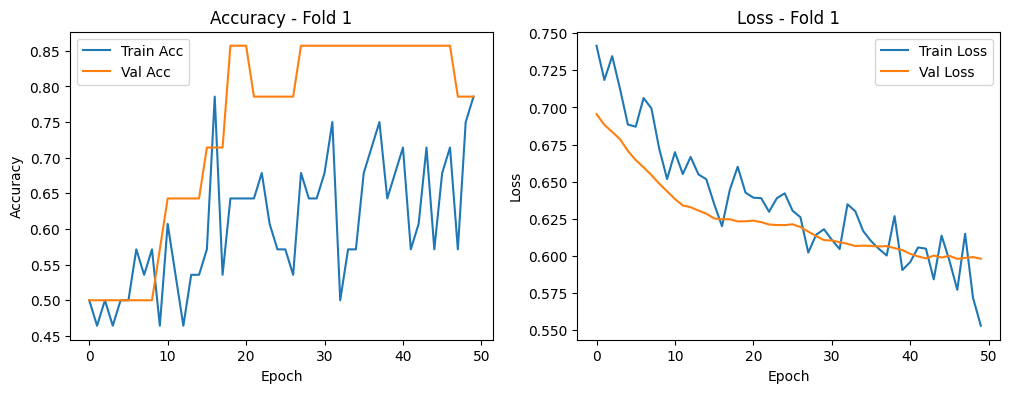

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step


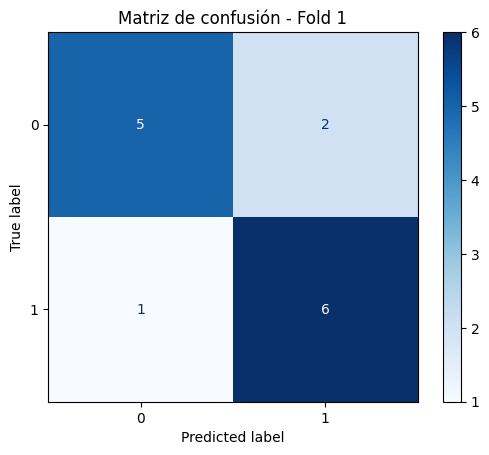

Matriz de confusión (números):
[[5 2]
 [1 6]]

Reporte de métricas:
              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.75      0.86      0.80         7

    accuracy                           0.79        14
   macro avg       0.79      0.79      0.78        14
weighted avg       0.79      0.79      0.78        14


=== Fold 2 ===


d:\Proyectos\JProyecto\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


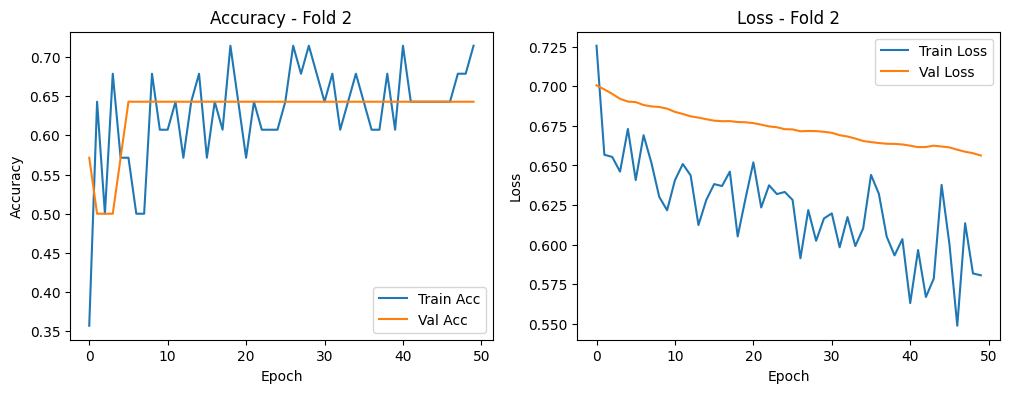

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


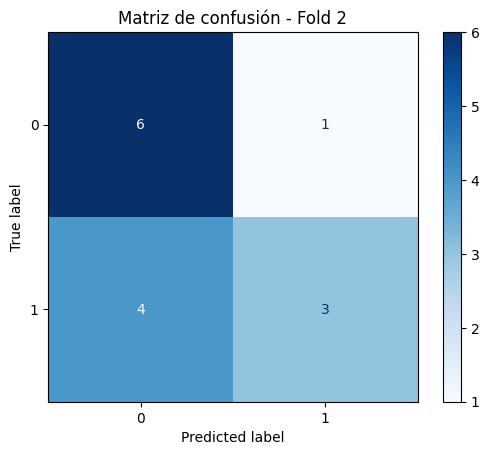

Matriz de confusión (números):
[[6 1]
 [4 3]]

Reporte de métricas:
              precision    recall  f1-score   support

           0       0.60      0.86      0.71         7
           1       0.75      0.43      0.55         7

    accuracy                           0.64        14
   macro avg       0.68      0.64      0.63        14
weighted avg       0.67      0.64      0.63        14


=== Fold 3 ===


d:\Proyectos\JProyecto\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


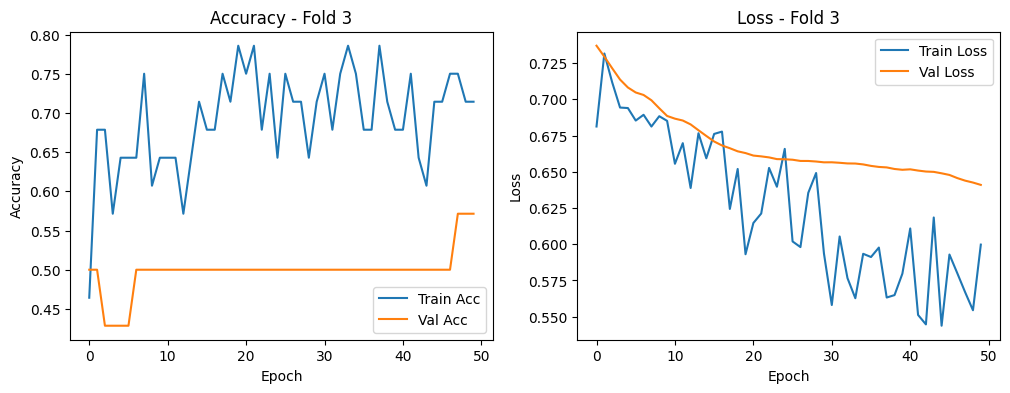

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


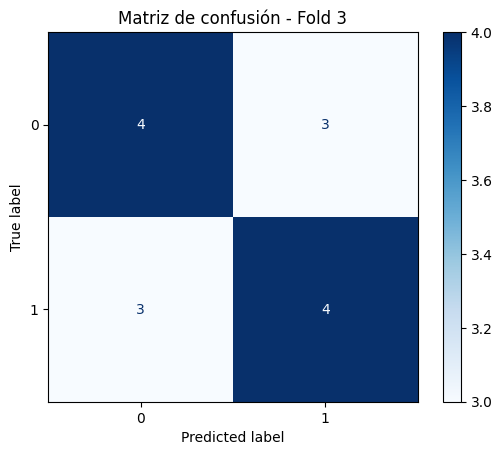

Matriz de confusión (números):
[[4 3]
 [3 4]]

Reporte de métricas:
              precision    recall  f1-score   support

           0       0.57      0.57      0.57         7
           1       0.57      0.57      0.57         7

    accuracy                           0.57        14
   macro avg       0.57      0.57      0.57        14
weighted avg       0.57      0.57      0.57        14

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


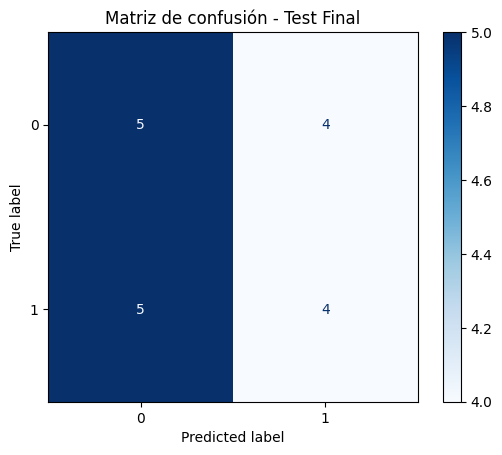


=== Test final ===
Matriz de confusión (números):
[[5 4]
 [5 4]]

Reporte de métricas:
              precision    recall  f1-score   support

           0       0.50      0.56      0.53         9
           1       0.50      0.44      0.47         9

    accuracy                           0.50        18
   macro avg       0.50      0.50      0.50        18
weighted avg       0.50      0.50      0.50        18



In [10]:

# Extracion de caracteristicas y target
features = ['success_rate', 'loss_count', 'varianza', 'longest_loss_streak']
X = df[features].values

# Variable objetivo: 1 si distancia es 25, 0 si es 5
y = (df['distancia'] == 25).astype(int)  #

# Normalizar features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Hold-out + Stratified K-Fold para validación robusta
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
fold = 1

for train_index, val_index in skf.split(X_train, y_train):
    print(f"\n=== Fold {fold} ===")
    X_tr, X_val = X_train[train_index], X_train[val_index]
    y_tr, y_val = y_train.iloc[train_index], y_train.iloc[val_index] if isinstance(y_train, pd.Series) else y_train[train_index]

    # Definir modelo MLP
    model = Sequential([
        Dense(16, input_dim=X_tr.shape[1], activation='relu'),
        Dropout(0.2),
        Dense(8, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Entrenar
    history = model.fit(X_tr, y_tr, validation_data=(X_val, y_val),
                        epochs=50, batch_size=4, verbose=0)

    # === Graficar curvas de entrenamiento ===
    plt.figure(figsize=(12,4))

    # Accuracy
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title(f'Accuracy - Fold {fold}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'Loss - Fold {fold}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

    # Evaluar en fold de validación
    y_val_pred_prob = model.predict(X_val)
    y_val_pred = (y_val_pred_prob > 0.5).astype(int).flatten()

    # === Matriz de confusión gráfica ===
    cm = confusion_matrix(y_val, y_val_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.title(f"Matriz de confusión - Fold {fold}")
    plt.show()

    print("Matriz de confusión (números):")
    print(cm)
    print("\nReporte de métricas:")
    print(classification_report(y_val, y_val_pred, zero_division=0))

    fold += 1

# Evaluar en test final
y_test_pred_prob = model.predict(X_test)
y_test_pred = (y_test_pred_prob > 0.5).astype(int).flatten()

# === Matriz de confusión en test final ===
cm_test = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp.plot(cmap="Blues")
plt.title("Matriz de confusión - Test Final")
plt.show()

print("\n=== Test final ===")
print("Matriz de confusión (números):")
print(cm_test)
print("\nReporte de métricas:")
print(classification_report(y_test, y_test_pred, zero_division=0))


Epoch 1/100


d:\Proyectos\JProyecto\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.6111 - loss: 0.7486 - val_accuracy: 0.8333 - val_loss: 0.4508
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5833 - loss: 0.6615 - val_accuracy: 0.8333 - val_loss: 0.4402
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6389 - loss: 0.5621 - val_accuracy: 0.9167 - val_loss: 0.4187
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8889 - loss: 0.4862 - val_accuracy: 0.9167 - val_loss: 0.3859
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8889 - loss: 0.4781 - val_accuracy: 0.9167 - val_loss: 0.3618
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8333 - loss: 0.4630 - val_accuracy: 0.9167 - val_loss: 0.3360
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8889 - loss: 0.3883 - val_accuracy: 1.0000 - val_loss: 0.3142
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9167 - loss: 0.3558 - val_accuracy: 1.0000 - val_loss: 0.2849
Epoc

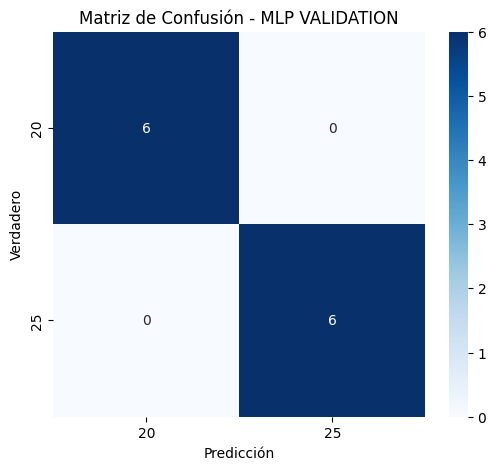

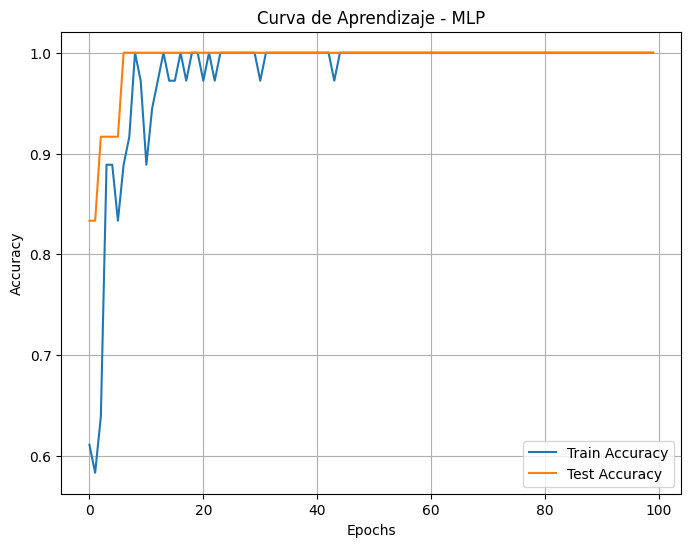

In [ ]:
# Este script entrena un modelo de aprendizaje profundo (MLP) para clasificar la distancia (20m o 25m) basado en un conjunto de características extraídas de un dataset CSV. Utiliza técnicas de normalización, división de datos y validación cruzada para asegurar un entrenamiento robusto y evaluar el rendimiento del modelo.
# utiliza el mismo pratron anterior pero utilizando features.csv 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Cargar dataset
df = pd.read_csv("out/features.csv")

# Separar features y etiqueta
X = df.drop(columns=['distancia'])
y = df['distancia']

# Convertir etiquetas a categorías (one-hot)
y_cat = to_categorical(y.map({20:0, 25:1}))  # 20 -> 0, 25 -> 1

# Normalizar features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir Train / Test / Validation
X_train_full, X_val, y_train_full, y_val = train_test_split(
    X_scaled, y_cat, test_size=0.2, random_state=42, stratify=y
)

X_train, X_test, y_train, y_test = train_test_split(
    X_train_full, y_train_full, test_size=0.25, random_state=42, stratify=y_train_full.argmax(axis=1)
)
# Aproximadamente 60% train, 20% test, 20% validation

# Definir modelo MLP
model = Sequential([
    Dense(64, input_dim=X.shape[1], activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')  # 2 clases: 20m / 25m
])

# Compilar modelo
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar modelo
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=8,
    verbose=1
)

# Evaluar en Validation
val_loss, val_acc = model.evaluate(X_val, y_val, verbose=0)
y_val_pred = model.predict(X_val)
y_val_classes = np.argmax(y_val_pred, axis=1)
y_val_true = np.argmax(y_val, axis=1)

print(f"\n✅ Accuracy en VALIDATION: {val_acc:.3f}")
print("\n=== Reporte de clasificación ===")
print(classification_report(y_val_true, y_val_classes))

# Matriz de confusión
cm = confusion_matrix(y_val_true, y_val_classes)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[20,25], yticklabels=[20,25])
plt.xlabel("Predicción")
plt.ylabel("Verdadero")
plt.title("Matriz de Confusión - MLP VALIDATION")
plt.show()

# Curva de aprendizaje (accuracy)
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title("Curva de Aprendizaje - MLP")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()
